# TODO:

- ordenar no tempo

# Nubank Data Challenge
## Risk Credit (default)

Análise Exploratória
Como dito, a inadimplência é o aspecto mais sensível quando se fala em crédito. Faça três visualizações que explorem a inadimplência na base fornecida.

Faça uma análise dos casos de fraude. Qual a relação deles com os casos de inadimplência?

Analisando a distribuição do volume de compras em 3 meses dos clientes (variável pv_3m), você diria que ela segue uma distribuição normal? Há algo de estranho nela? Se sim, qual seria a justificativa ou hipótese para tal?

In [15]:
%%capture

""" Useful notebook definitions

Some usefull notebook definitions, like plots color scheme
and cell behavior were extracted to another notebook just
for a cleaner view
"""
%run ./notebook_utils.ipynb

## Loading the dataset

In [16]:
path = '../data/raw/'

In [17]:
train_df = pd.read_csv(path + 'acquisition_train.csv')
train_df.shape

(45000, 43)

### Target Default Analisys

Total: 45000 - Null: 3259 - Not-Null: 41741 - (7.24% Null)


False    35080
True      6661
Name: target_default, dtype: int64

Text(-0.15,32080,'35080 - (77.96%)')

Text(0.85,3661,'6661 - (14.80%)')

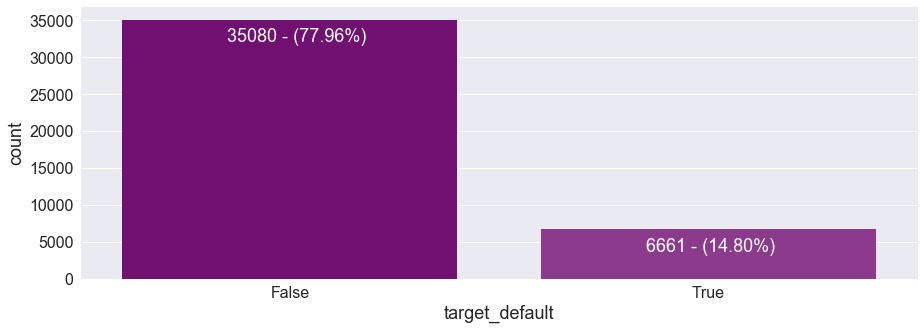

In [19]:
# # TODO: Extrair para função
# aquisition_default = aquisition[aquisition['target_default'] == True]
# total_default = aquisition_default['ids'].count()

# aquisition_ok = aquisition[aquisition['target_default'] == False]
# total_ok = aquisition_ok['ids'].count()

# aquisition_unknown = aquisition[aquisition['target_default'].isnull()]
# total_unknown = aquisition_unknown['ids'].count()

# aquisition_total = aquisition.shape[0]
# total_known = total_default + total_ok
# aquisition_unknown_percent = total_unknown / aquisition_total * 100

# print('Total: {} - Null: {} - Not-Null: {} - ({:.2f}% Null)'.format(aquisition_total, 
#                                                                     total_unknown, 
#                                                                     total_known, 
#                                                                     aquisition_unknown_percent))

# aquisition['target_default'].value_counts()







# TODO: Extrair para função
target_total = len(train_df['target_default'])
target_null = train_df[train_df['target_default'].isnull()]['ids'].count()
target_not_null = target_total - target_null
target_null_percent = target_null / target_total * 100

print('Total: {} - Null: {} - Not-Null: {} - ({:.2f}% Null)'.format(target_total, 
                                                                    target_null, 
                                                                    target_not_null, 
                                                                    target_null_percent))

train_df['target_default'].value_counts()

plt.figure(figsize=(15,5))
ax = sns.countplot('target_default', data=train_df)
for p in ax.patches:
    count = p.get_height()
    percent = 100 * count / len(train_df['target_default'])
    ax.annotate('{} - ({:.2f}%)'.format(count, percent),
                (p.get_x()+0.25, p.get_height()-3000), 
                color='white')

## Separate a dataset with only default

We need to understand better the default cases, so, we need to separate this cases and take a closer look into this

In [4]:
# We need to force comparing == True because of the null values in column
default_df = train_df[train_df['target_default'] == True]
default_df.shape

(6661, 43)

### Basic inspecting into default dataset

In [5]:
default_df.info()
default_df.describe()

default_df.head()
default_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 2 to 44998
Data columns (total 43 columns):
ids                                                 6661 non-null object
target_default                                      6661 non-null object
score_1                                             6661 non-null object
score_2                                             6661 non-null object
score_3                                             6661 non-null float64
score_4                                             6661 non-null float64
score_5                                             6661 non-null float64
score_6                                             6661 non-null float64
risk_rate                                           6661 non-null float64
last_amount_borrowed                                2202 non-null float64
last_borrowed_in_months                             2202 non-null float64
credit_limit                                        4640 non-null float64
reason  

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,6661.00,6661.00,6661.00,6661.00,6661.00,2202.00,2202.00,4640.00,6661.00,2821.00,6642.00,6660.00,6661.00,5016.00,6661.00,3290.00,6661.00,4364.00,6254.00,6661.00,6661.00,6661.00
mean,358.36,100.02,0.50,99.88,0.32,14580.39,44.57,32893.81,65894.10,34.73,0.09,0.00,10.80,11.24,240.25,0.00,1.51,0.51,12.83,500.66,inf,33710.48
std,108.85,3.18,0.29,9.91,0.10,8396.58,11.50,34955.63,41261.94,21.90,0.29,0.09,4.65,4.65,149.30,0.00,1.12,0.50,112.23,286.48,nan,12749.63
min,30.00,87.72,0.00,61.17,0.04,1016.01,36.00,0.00,4835.29,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,-999.00,0.00,410.00,12004.00
25%,280.00,97.92,0.25,93.38,0.24,8023.38,36.00,9953.75,41022.46,16.00,0.00,0.00,8.00,8.00,110.00,0.00,1.00,0.00,7.00,251.00,50276.00,22614.00
50%,350.00,100.04,0.49,100.02,0.31,13014.58,36.00,25000.00,57507.77,32.00,0.00,0.00,10.00,10.00,239.00,0.00,2.00,1.00,22.00,505.00,102895.00,33425.00
75%,430.00,102.18,0.75,106.53,0.38,20019.27,60.00,45227.75,80014.17,51.00,0.00,0.00,13.00,14.00,371.00,0.00,3.00,1.00,41.00,746.00,151055.00,44604.00
max,850.00,111.11,1.00,135.37,0.81,35050.17,60.00,379793.00,800015.45,135.00,5.00,5.00,38.00,38.00,500.00,0.00,3.00,1.00,59.00,1000.00,inf,55998.00


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,10.00,nan,00:60:02,6,gmail.com,nan,2,nan,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
9,4146cbf8-1ec5-f381-e5c4-1ffad3a3e37e,True,e4NYDor1NOw6XKGE60AWFw==,cdpgyOyZS04uXerMNu7uCw==,390.00,97.61,0.44,102.91,0.36,nan,nan,16291.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,45026.26,False,P1TKs1aii8osbgO+MszZ2w==,FcreDj8X5CjkLfqOjlBKIQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,8.00,8.00,04:47:22,7,hotmail.com,0.00,2,0.00,nan,elisete,703,"(-16.61107269517449, -49.34324651918292)",Facebook,132-3263001,96889.00,BR-PE,45389,"{'tags': ['n9', 'pro+aty', 'n2', 'n1']}",Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....,fraud_friends_family
26,37c771c7-24d3-872d-7ae5-1cb451ee2862,True,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,330.00,94.49,0.01,106.91,0.36,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,35033.77,True,sjJbkqJS7cXalHLBFA+EOQ==,m166fujAW3mxeazX/Dgeyg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,16.00,16.00,12:20:35,116,gmail.com,0.00,1,1.00,-1.00,tairo,752,"(-4.695338084081564, -45.241964599844636)",NaN,756-5990865,120864.00,BR-SP,25385,"{'tags': ['n1', 'n12', 'n6']}",Mozilla/5.0 (Linux; Android 4.4.3; KFTHWI Buil...,NaN
30,5f996d85-2c0d-96e5-70ce-49da7506c06b,True,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,210.00,103.10,0.27,100.55,0.32,nan,nan,19457.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,84023.52,False,kfFcVGcsJmH2n3eYprLkeQ==,uzfL1XDSVwfCcEB62KNrXA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,1.00,0.00,7.00,7.00,03:55:08,458,gmail.com,nan,1,1.00,nan,girinaldo,76,"(-8.901592495939513, -36.45614327740766)",Waiting-list,300-5497661,57315.00,BR-SE,26043,"{'tags': ['dfa', 'a15', 'n11', 'aty', 'da']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
31,155dc0ee-9391-6a46-a097-b4d0caedb237,True,8k8UDR4Yx0qasAjkGrUZLw==,d/7Hedyz7ovK9Pn1CYN4+A==,370.00,97.95,0.67,122.22,0.34,nan,nan,54043.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,58008.26,True,1DpYl6dtzY0qE33poow3iw==,5+hFO+Ijqlyd0EWKBL3fjQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,22.00,22.00,19:36:46,258,gmail.com,nan,1,nan,26.00,vani,84,"(-4.837956574473234, -38.158737114370204)",NaN,241-9765163,165283.00,BR-PR,41868,"{'tags': ['aty', 'aty', 'dfa']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,fraud_friends_family


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44970,2f6c0d8b-d711-fd86-8514-3f50054581bc,True,e4NYDor1NOw6XKGE60AWFw==,NLvAOzzmJba/0zolQnWF5Q==,340.00,99.26,0.52,107.55,0.51,19801.14,60.00,8878.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,45025.16,NaN,yni6lL4oSly97UVZeRSyxA==,JAH7Mz3uhkwsIfkUurhC7Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,13.00,13.00,00:42:25,274,gmail.com,nan,3,1.00,23.00,adalia,903,"(-16.73156326773506, -49.218675133052336)",Twitter,714-2498376,106542.00,BR-SC,23425,"{'tags': ['n2', 'n17', 'c55', 'n0', 'n14']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
44975,0b8eaeb9-f941-715a-e519-4ba56a440e41,True,8k8UDR4Yx0qasAjkGrUZLw==,OlDYtdljgSSYM/M1L2CRaQ==,270.00,100.93,0.83,110.14,0.40,16457.73,60.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,42022.09,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,32.00,0.00,0.00,7.00,7.00,01:53:04,96,gmail.com,0.00,3,0.00,8.00,dielai,887,"(-25.364047299123182, -51.47550369133489)",Radio-commercial,117-2155048,105698.00,BR-PB,17726,"{'tags': ['n15', 'a15', 'n16']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN
44985,be8dc734-2824-b773-fb1b-762cd38c2b14,True,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,380.00,99.21,0.13,97.01,0.25,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,27022.58,True,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,5.00,nan,00:29:37,237,hotmail.com,nan,1,1.00,13.00,adir,665,"(-4.939779771454179, -38.1356508509967)",Website,150-8850851,116787.00,BR-AL,32911,"{'tags': ['n15', 'b19', 'n5', 'n10', 'a15']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44991,68bbeb57-dcbf-9626-2f72-184b27e5b19a,True,8k8UDR4Yx0qasAjkGrUZLw==,OlDYtdljgSSYM/M1L2CRaQ==,370.00,98.71,0.20,96.11,0.22,5022.86,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,21008.76,False,x6Gw/1I8t3KPgT6s82Kodg==,Hfh28TzqkRno6rOU/tjy6Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,17.00,nan,01:37:37,358,gmail.com,nan,3,1.00,51.00,vademir,278,"(-6.9295671630072775, -34.77166519934908)",Waiting-list,603-6228526,26014.00,BR-MS,24558,"{'tags': ['n16', 'n9', 'n5', 'pro+aty', 'n15']}","Mozilla/5.0 (iPhone9,4; U; CPU iPhone OS 10_0_...",NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.00,100.48,0.21,86.76,0.37,nan,nan,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,185018.07,True,xsd3ZdsI3356I3xMxZeiqQ==,Kihc6OKBTIHsGwCQy2Vruw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,53.00,0.00,0.00,10.00,10.00,02:18:51,35,gmail.com,0.00,0,1.00,2.00,hidelburgo,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.00,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


### Closer look into some columns

#### Single value columns

The columns `channel` and `external_data_provider_credit_checks_last_2_year` have only unique values in each of them.

They should be removed.

In [6]:
default_df['channel'].value_counts()
default_df['external_data_provider_credit_checks_last_2_year'].value_counts()

default_df.drop(['channel','external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

NCqL3QBx0pscDnx3ixKwXg==    6661
Name: channel, dtype: int64

0.00    3290
Name: external_data_provider_credit_checks_last_2_year, dtype: int64

/Users/adrianofreitas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Sparse columns (less than 10%)
- job_name
- reason
- zip - com muitos valores podem ser códigos de regiões grandes, pode ser substituído pelo estado?
- job_name
- shipping_zip_code

#### Colunas que não batem
- state

#### Comparar com não default
- real_state
- n_bankruptcies
- n_defaulted_loans

#### Abrir o dicionário
- profile_tags

#### Agrupar por sistema
- user_agent

In [27]:
default_df['score_1'].value_counts()
default_df['score_2'].value_counts()
default_df['reason'].value_counts()
default_df['state'].value_counts()
default_df['zip'].value_counts()
default_df['job_name'].value_counts()
default_df['real_state'].value_counts()
default_df['marketing_channel'].value_counts()
default_df['shipping_state'].value_counts()
default_df['shipping_zip_code'].value_counts()
default_df['profile_tags'].value_counts()
default_df['user_agent'].value_counts()
default_df['last_borrowed_in_months'].value_counts()
default_df['ok_since'].value_counts()
default_df['n_bankruptcies'].value_counts()
default_df['n_defaulted_loans'].value_counts()

1Rk8w4Ucd5yR3KcqZzLdow==    1866
DGCQep2AE5QRkNCshIAlFQ==    1649
8k8UDR4Yx0qasAjkGrUZLw==    1385
e4NYDor1NOw6XKGE60AWFw==     785
4DLlLW62jReXaqbPaHp1vQ==     453
smzX0nxh5QlePvtVf6EAeg==     414
fyrlulOiZ+5hoFqLa6UbDQ==     109
Name: score_1, dtype: int64

SaamrHMo23l/3TwXOWgVzw==    426
LCak332j+TYFqHC3NDwiqg==    399
osCzpM4hJrxugqWWuZmMWw==    387
IOVu8au3ISbo6+zmfnYwMg==    385
/tdlnWjXoZ3OjdtBXzdOJQ==    368
rJZgTmANW3PjOCQLCcp4iQ==    359
dCm9hFKfdRm7ej3jW+gyxw==    355
7h+tk4z7O9brtBSe1rNjxA==    319
d/7Hedyz7ovK9Pn1CYN4+A==    307
OlDYtdljgSSYM/M1L2CRaQ==    304
RO7MTL+j4PH2gNzbhNTq/A==    290
wkeCdGeu5sEv4/fjwR0aDg==    279
+CxEO4w7jv3QPI/BQbyqAA==    265
mX2VRRG38RPiHX+MfjefRw==    230
Fv28Bz0YRTVAT5kl1bAV6g==    227
ky19q4V1ZqgL3jnHX0wKDw==    198
NLvAOzzmJba/0zolQnWF5Q==    170
pAzpxkhjPsjWldgSX21+zg==    169
cdpgyOyZS04uXerMNu7uCw==    154
w1miZqhB5+RSamEQJa0rqg==    137
tQUTfUyeuGkhRotd+6WjVg==    131
A+QuW1n/ABeiVVe/9CRZ9Q==    126
bopP0NxW3+r8tn9xIHTaOw==    117
tHpS8e9F8d9zg3iOQM9tsA==     98
vJyc9xom9v7hwFMPTIpmKw==     90
7h8PTkrlTWUPP3yuyP4rUg==     63
O4i7FxcROACMVTCgI0WXuA==     60
YLGMUI9hObSh6wD/xfanGg==     54
wjdj2vxjWoDsEIk0l09ynw==     52
6J1ZMTzN5GKHXnhM4J1JbA==     49
emS9xH8CLoRNie2uSmaDAQ==     36
+2hzpeP1

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW    714
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHIRsMoD5e3RXcnWOgQJkT1p    455
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIW76/BS2rZFHqQxXY+8F9NKu9aZ57vT61+K2XFrHtvT9    188
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIRd8GOItgxlRAUGKcWd5xXCeKq5W600DOWmwjMTqsrAW    170
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiH9ooDQPWyPZgJWyjKkQUjr    134
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiFU8+AuCsj5fSH4KVfE3LF9    113
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIeWE6/Di5FBOmihprdjI0zb3rnJkUI6G1sJC0+Ao35Wk    100
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhX

xsd3ZdsI3356I3xMxZeiqQ==    1092
BB/zpwTH+8GCIVHlhzOU1Q==     629
1DpYl6dtzY0qE33poow3iw==     525
sjJbkqJS7cXalHLBFA+EOQ==     432
x6Gw/1I8t3KPgT6s82Kodg==     284
kfFcVGcsJmH2n3eYprLkeQ==     236
GW2VZ3dN3OGHSjQ6JkfqQw==     224
JrdZzPZEa/YIIGwh8OdTKA==     221
7bX4XFXmYqoMspxup0CrKA==     215
82aTqSzrTImY+SbAOBQzGQ==     208
0lQuvmygO68ZFXZjzHEOww==     199
rrVbgRNTRyB6auEycsRrpA==     175
1vMmtGURgMcjxQbV2KQiUw==     170
/EoxQEzy1PWWTtv6DNwr2w==     158
Ygq6MsM98oC8yceExr69Ig==     158
fR2lwAMjCb/fNXjsApiOTw==     137
OCoEDgPLpDjHcbEmPpAjvA==     125
bNDXnbe7XAx/VUe+cbjDiw==     113
VafbDA6D5W2TpGMAUJbW8Q==     103
QCVqG0wT4xPLQuiTIExO2w==     100
5hPtRY8gW/3+fPXvGIgWTg==     100
1xxlFOWSFxK0/J2VdCKP3g==      98
ygE7OTdsxRMLeXMa0EZwZw==      88
qItmSqWrjm+MopDA+UpKRw==      78
/L8vvVesB5WyAv190Hw/rQ==      76
ZUmHOp1/xBWh5O/uqDutsw==      68
/78Q+NAqnsdbiE2JReYK9Q==      67
ZVfsutsd1Go0zZEnGp0vEA==      64
P1TKs1aii8osbgO+MszZ2w==      59
0gQEZgRHqS5KSF3oWQrQfw==      58
KET/Pmr6rH

8REhu8TWlarYwZKjbn1BNA==    76
3k2JCQ8Bp5oDwaI39ZJgHA==    76
Hfh28TzqkRno6rOU/tjy6Q==    75
IvtRWE7TLKqrAj9T90HrUg==    69
hKNrx1SIxunqIpoE9PPlow==    69
Kihc6OKBTIHsGwCQy2Vruw==    66
iY2cULhh/NFBaiOCRferZQ==    65
MXqE7D0NclzbvSzSxV4b/Q==    63
rlWIXTBO+VOa34+SpGyhlQ==    61
lLe2iVfUFZSZusoGCZYB8A==    60
886qU4ALtTVHJHC/UTfedg==    60
LqsmduGRTUSbhLbKf30e8A==    57
exaXk+hI3vMFsjz87ctTUg==    51
i036nmJ7rfxo+3EvCD7Jnw==    51
vwoGcNrYRsau3tbrE/eDAw==    49
/+82UC3tzFrNWWenFmhJGg==    47
2VYdrV7ppg29D3nrgrvsZQ==    47
dNSI+Dduv0H7gGnqOvJ4xw==    46
ql9Tq+WRLqXnyVdZkMRgnQ==    44
Ernn+uVXCMq/6ARrBCcd+A==    43
ZOspmQ1ZqC0FSMvxm2UCwQ==    43
z61ternSVugdYcUtx+e1gQ==    43
ceNlmpI8ZLlwn9L3DMcBLQ==    42
PC7jR66+ygcMDBsuITKtFg==    40
IkavYIMybwGTChPpS3dJ6Q==    39
RzBRHVDh7O8oq77Z8+TDyg==    38
wXaZCM/DrxO/8EsPvmITIg==    38
xKFbYDl5iprg13oyD/ZSUA==    37
oAJut+wvWcA9SKa65aezMg==    37
8qgxecfbVQrBbH6hc6MigQ==    36
                            ..
eWxS064nYbrouukSphiNgA==     1
sS21wy0L

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=    19
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=    17
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    16
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIUGp9a+9oBSLvyI5Jdz9fNg=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSISzmgfFzT+qYrtqTHkJFqpA=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIV56G3kjZxQ0yMeb3IU2UKE=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIb4ADj/ykkhgM886TEQ8yrI=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfeSCTDWhw2hS0GDfQEUVwM=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh/cdCiaVzVo/KVM2J

N5/CE7lSkAfB04hVFFwllw==    3054
n+xK9CfX0bCn77lClTWviw==    3042
nSpvDsIsslUaX6GE6m6eQA==     555
UX7AdFYgQh+VrVC5eIaU9w==      10
Name: real_state, dtype: int64

Website             1892
Waiting-list        1056
Invite-web           546
Radio-commercial     461
Twitter              446
Instagram            444
LinkedIn             443
Facebook             435
Invite-email         415
Name: marketing_channel, dtype: int64

BR-SP    1114
BR-AM     592
BR-GO     372
BR-BA     361
BR-RR     332
BR-MG     325
BR-TO     212
BR-DF     212
BR-MA     208
BR-PE     201
BR-AP     197
BR-CE     196
BR-MS     194
BR-MT     192
BR-AC     190
BR-SE     189
BR-AL     186
BR-RO     186
BR-RN     182
BR-ES     175
BR-PR     175
BR-PA     174
BR-PB     169
BR-SC     165
BR-RS     162
Name: shipping_state, dtype: int64

31406    4
54066    3
19711    3
12750    3
44807    3
55390    3
55397    3
23108    3
28443    3
51422    3
54591    3
21001    3
43298    3
29520    3
46971    3
55149    3
24828    3
45711    3
49099    3
46648    3
17459    3
53451    3
32748    3
15497    3
17165    3
39615    3
15225    3
23469    3
32847    2
17634    2
        ..
44251    1
31965    1
31004    1
21728    1
48353    1
19683    1
53973    1
33990    1
42146    1
44418    1
40101    1
50342    1
36188    1
21672    1
23721    1
14355    1
32869    1
38064    1
48305    1
54452    1
41092    1
23993    1
19913    1
54460    1
31933    1
42174    1
46885    1
25794    1
48495    1
12774    1
Name: shipping_zip_code, Length: 6176, dtype: int64

{'tags': ['a15']}                                    65
{'tags': ['nim']}                                    64
{'tags': ['dfa']}                                    60
{'tags': ['pro+aty']}                                60
{'tags': ['da']}                                     58
{'tags': ['n8']}                                     52
{'tags': ['n16']}                                    51
{'tags': ['c55']}                                    50
{'tags': ['aty']}                                    49
{'tags': ['n14']}                                    48
{'tags': ['n19']}                                    45
{'tags': ['b19']}                                    44
{'tags': ['n2']}                                     43
{'tags': ['n15']}                                    43
{'tags': ['n3']}                                     42
{'tags': ['n10']}                                    42
{'tags': ['n6']}                                     41
{'tags': ['c1']}                                

Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.366                  46
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.369                  45
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.363                  44
Mozilla/5.0 (Linux; Android 4.4.3; KFTHWI Build/KTU84M) AppleWebKit/537.36 (KHTML, like Gecko) Silk/47.1.79 like Chrome/47.0.2526.80 Safari/537.367               43
Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41020c Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/34.0.1847.118 Safari/537.362           43
Mozilla/5.0 (Linux; Android 6.0.1; SHIELD Tablet K1 Build/MRA58K; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/55.0.2883.91 Safari/537.361       42
Mozilla/5.

36.00    1416
60.00     786
Name: last_borrowed_in_months, dtype: int64

8.00      68
13.00     66
9.00      66
14.00     61
10.00     59
25.00     57
19.00     56
12.00     55
16.00     51
20.00     51
17.00     50
30.00     50
21.00     50
11.00     49
40.00     48
6.00      48
33.00     48
44.00     46
45.00     46
15.00     46
22.00     44
38.00     44
18.00     43
41.00     43
27.00     43
7.00      41
28.00     41
29.00     40
32.00     39
5.00      39
          ..
51.00     24
73.00     24
69.00     23
61.00     23
37.00     23
55.00     22
80.00     22
77.00     21
3.00      21
64.00     20
4.00      20
68.00     19
65.00     19
50.00     17
66.00     17
78.00     17
67.00     17
57.00     16
76.00     16
71.00     15
81.00     14
0.00      13
1.00      12
79.00     11
82.00     10
83.00      3
84.00      1
90.00      1
135.00     1
97.00      1
Name: ok_since, Length: 88, dtype: int64

0.00    6090
1.00     541
2.00       9
5.00       1
4.00       1
Name: n_bankruptcies, dtype: int64

0.00    6633
1.00      25
3.00       1
5.00       1
Name: n_defaulted_loans, dtype: int64

In [28]:
# verificando se prefixos correlacionam com estados
phone_prefix = train_df['profile_phone_number'].map(lambda x: x[:2])
phone_prefix.name = 'prefix_phone_number'
train_df = pd.concat([train_df, phone_prefix], axis=1)
train_df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,prefix_phone_number
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,nan,2,0.00,51.00,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,51
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,nan,nan,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,25
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,10.00,nan,00:60:02,6,gmail.com,nan,2,nan,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,23
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,nan,nan,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,nan,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,nan,3,nan,38.00,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,26
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,11.00,nan,13:39:03,240,gmail.com,0.00,2,1.00,46.00,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.00,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN,10


### Removing unvaluable columns

The columns listed below do not aggregate information for our analisys:
- channel - there is only one value, namely NCqL3QBx0pscDnx3ixKwXg==
- external_data_provider_first_name
- profile_phone_number
- profile_tags
- user_agent

### Target Analisys

We can see above there is some missing values on target column. let's take a closer look...

Total: 45000 - Null: 3259 - Not-Null: 41741 - (7.24% Null)


False    35080
True      6661
Name: target_default, dtype: int64

Text(-0.15,32080,'35080 - (77.96%)')

Text(0.85,3661,'6661 - (14.80%)')

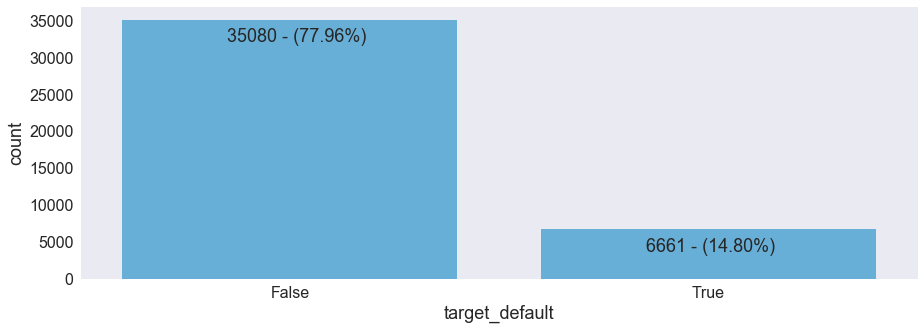

In [29]:
# TODO: Extrair para função
target_total = len(train_df['target_default'])
target_null = train_df[train_df['target_default'].isnull()]['ids'].count()
target_not_null = target_total - target_null
target_null_percent = target_null / target_total * 100

print('Total: {} - Null: {} - Not-Null: {} - ({:.2f}% Null)'.format(target_total, 
                                                                    target_null, 
                                                                    target_not_null, 
                                                                    target_null_percent))

train_df['target_default'].value_counts()

plt.figure(figsize=(15,5))
ax = sns.countplot('target_default', data=train_df, color=default_color)
for p in ax.patches:
    count = p.get_height()
    percent = 100 * count / len(train_df['target_default'])
    ax.annotate('{} - ({:.2f}%)'.format(count, percent), 
                (p.get_x()+0.25, p.get_height()-3000))

#### Drop missing in target

Missing values in our target variable represents 7,24%. Let's drop.

In [31]:
train_df.dropna(subset=['target_default'], inplace=True)
train_df.shape
train_df.info()

(41741, 44)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 44 columns):
ids                                                 41741 non-null object
target_default                                      41741 non-null object
score_1                                             41741 non-null object
score_2                                             41741 non-null object
score_3                                             41741 non-null float64
score_4                                             41741 non-null float64
score_5                                             41741 non-null float64
score_6                                             41741 non-null float64
risk_rate                                           41741 non-null float64
last_amount_borrowed                                14133 non-null float64
last_borrowed_in_months                             14133 non-null float64
credit_limit                                        28632 non-null flo

### Remove unknown columns

We need to remove all unknown columns at acquisition time

TODO: Verificar as colunas:
- risk_rate

In [37]:
unknown = ['credit_limit']
for col in unknown:
    train_df.drop(col, axis=1, inplace=True)

ValueError: labels ['credit_limit'] not contained in axis

### Check consistency values

Valores negativos por exemplo

### Remove ids

TODO: verificar essa parte de separar a variável

Now we have to separate the column `ids` to create submission file at end and drop this column

In [36]:
train_df.drop('ids', axis=1, inplace=True)

ValueError: labels ['ids'] not contained in axis

### Other Missing values

As we can see, there is missing values in our target column

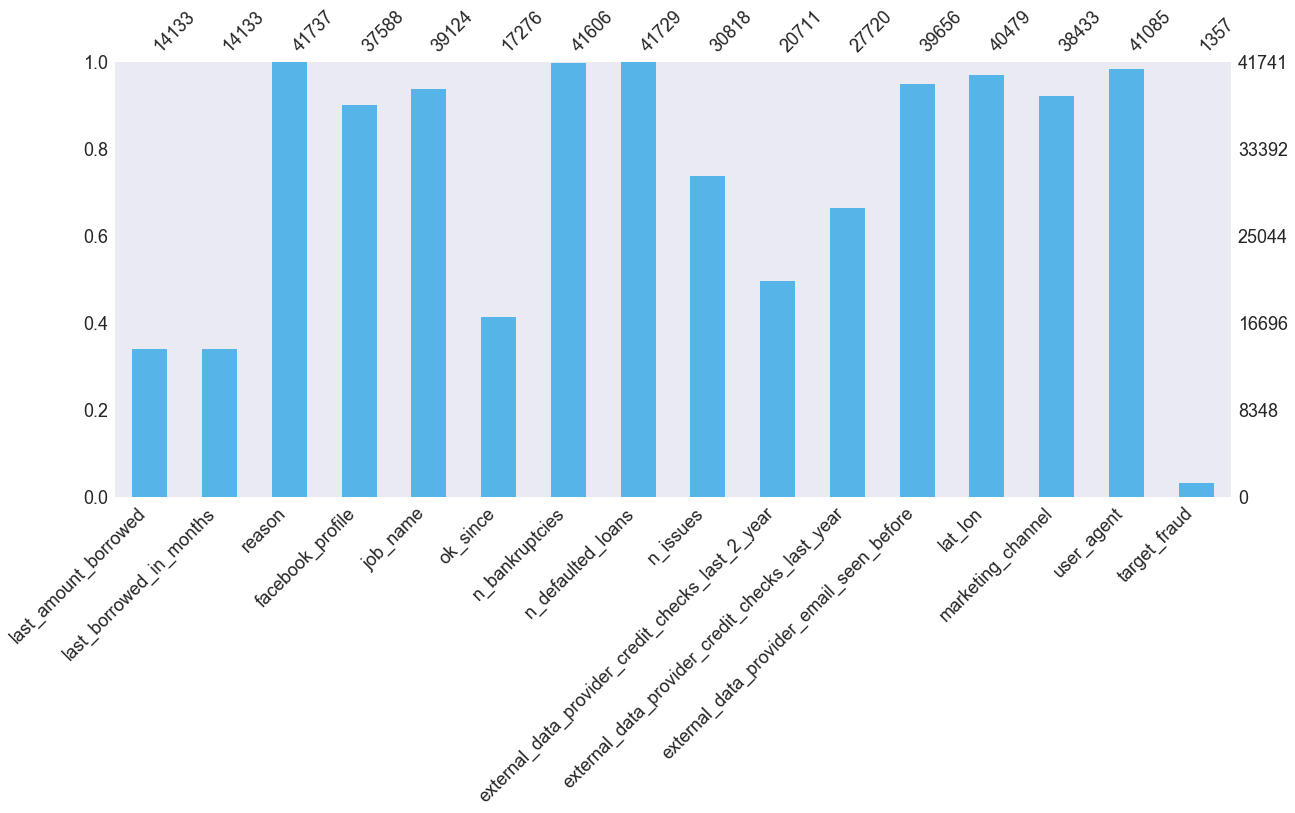

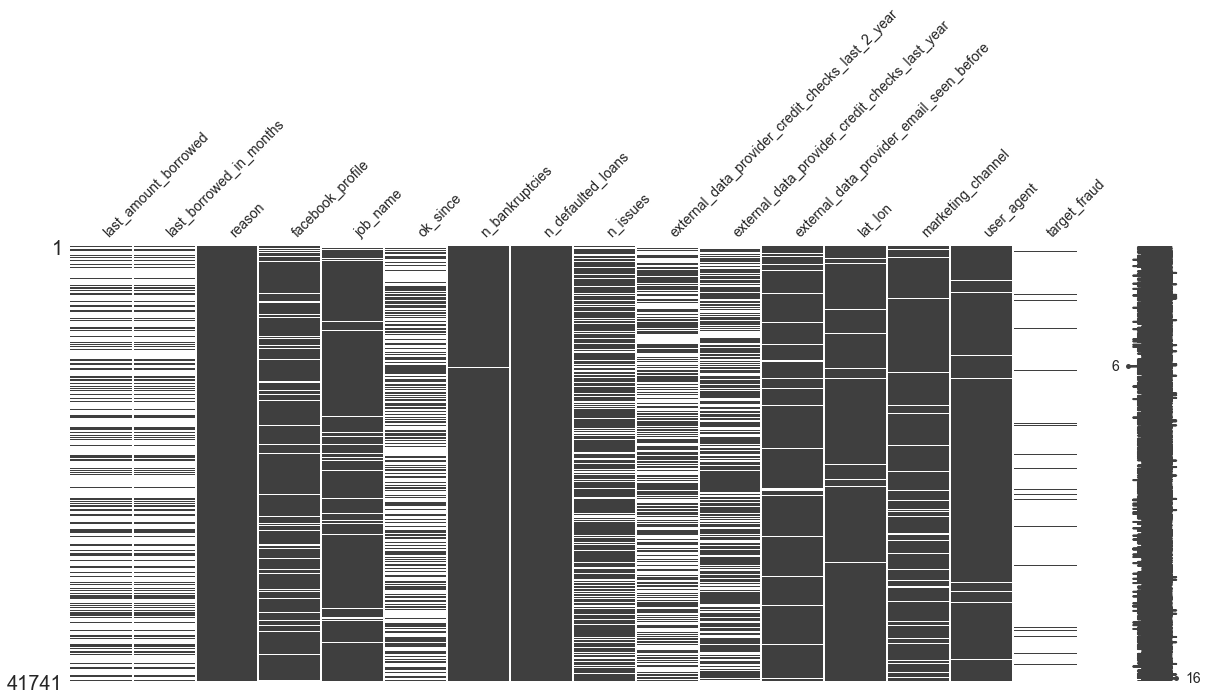

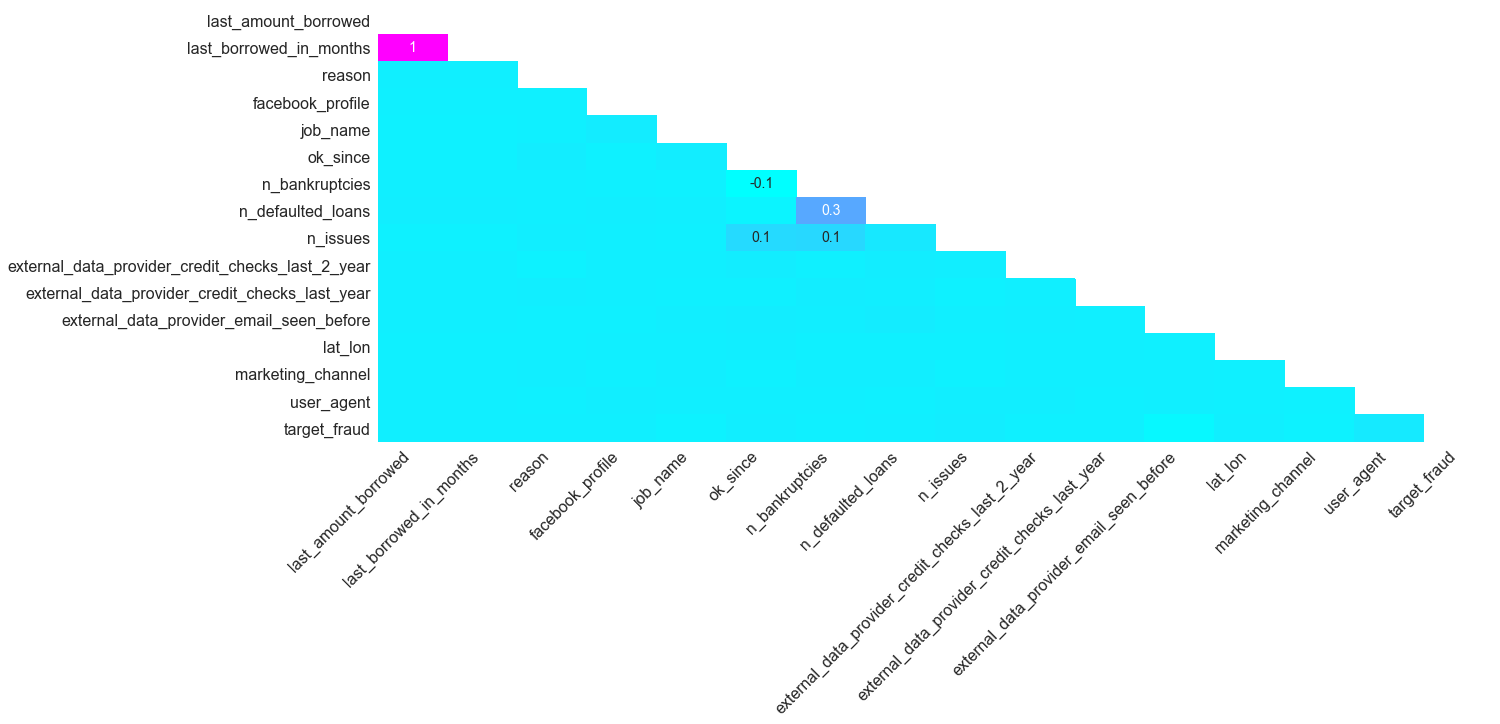

In [38]:
missing_value_columns = train_df.columns[train_df.isnull().any()].tolist()
train_df_missing = train_df[missing_value_columns]

msno.bar(train_df_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
msno.matrix(train_df_missing,figsize=(20,8),fontsize=14)
msno.heatmap(train_df_missing,figsize=(20,8),cmap=colormap)

# Spend dataset

In [9]:
spend = pd.read_csv(path + 'spend_train.csv')
spend.shape
spend.info()
spend.describe()
spend.head()
spend.tail()

(980818, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980818 entries, 0 to 980817
Data columns (total 7 columns):
ids                  980818 non-null object
credit_line          980818 non-null int64
month                980818 non-null int64
spends               980818 non-null float64
revolving_balance    980818 non-null float64
card_request         980818 non-null int64
minutes_cs           980818 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 52.4+ MB


,credit_line,month,spends,revolving_balance,card_request,minutes_cs
count,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00
mean,6450.70,12.10,2878.07,481.07,0.09,2.79
std,4564.60,8.52,3529.03,1431.83,0.29,6.64
min,506.00,0.00,0.00,0.00,0.00,0.00
25%,2948.00,5.00,334.76,0.00,0.00,0.00
50%,5314.00,11.00,1568.16,1.53,0.00,0.00
75%,8763.00,18.00,4129.00,141.66,0.00,1.72
max,20484.00,35.00,20462.23,20369.44,1.00,75.58


,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
980813,e4a637b5-7bc0-456c-5cd6-b4407af89901,5537,1,900.12,2.21,0,1.48
980814,e4a637b5-7bc0-456c-5cd6-b4407af89901,5537,2,121.75,0.00,0,0.00
980815,0ccbb46d-59b3-539f-d6c9-a8bde0520ca6,4081,0,131.98,1.95,1,0.00
980816,0ccbb46d-59b3-539f-d6c9-a8bde0520ca6,4081,1,4074.95,37.86,1,39.76
980817,0ccbb46d-59b3-539f-d6c9-a8bde0520ca6,4081,2,945.88,2.25,0,15.35


In [10]:
36/12

3.0

In [11]:
for client_id in train_df['ids']:
    print(client_id)
    break

343b7e7b-2cf8-e508-b8fd-0a0285af30aa


In [17]:
spend[spend['ids'] == '343b7e7b-2cf8-e508-b8fd-0a0285af30aa']
# sobra revolving
# percentual revolving
# meses de revolving
# percentual dos meses de revolving
# credit line inicial
# credit line atual
# vias de cartao requisitadas
# total de minutos no suporte
# percentual gasto em relacao ao limite
# acompanhamento do limite


# análise de iadimplecia
# grupos de linha de credito
# numero de revolvig
# percentual de revolving
# nunca revolving vs pelo menos um

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
740359,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,0,680.44,0.59,1,0.00
740360,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,1,1973.05,17.31,0,4.49
740361,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,2,1973.88,17.31,0,0.00
740362,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,3,573.76,0.44,0,0.00
740363,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,4,1756.89,0.01,0,0.00
740364,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,5,868.80,0.00,0,0.00
740365,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,6,1267.01,148.65,0,0.00
740366,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,7,1589.64,974.73,0,7.63
740367,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,8,920.34,23.46,0,0.00
740368,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,9,579.36,0.11,0,0.00


In [21]:
# sobra revolving
spend[spend['ids'] == '343b7e7b-2cf8-e508-b8fd-0a0285af30aa']

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,paid
740359,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,0,680.44,0.59,1,0.00,679.85
740360,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,1,1973.05,17.31,0,4.49,1955.74
740361,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,2,1973.88,17.31,0,0.00,1956.57
740362,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,3,573.76,0.44,0,0.00,573.32
740363,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,4,1756.89,0.01,0,0.00,1756.88
740364,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,5,868.80,0.00,0,0.00,868.80
740365,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,6,1267.01,148.65,0,0.00,1118.36
740366,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,7,1589.64,974.73,0,7.63,614.91
740367,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,8,920.34,23.46,0,0.00,896.88
740368,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,1995,9,579.36,0.11,0,0.00,579.25


In [22]:
spend['paid'] = spend['spends'] - spend['revolving_balance']
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,paid
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00,6269.50
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,793.40
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00,7167.94
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55,16631.05
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89,115.29


In [42]:
df_limit = train_df[['ids', 'credit_limit']]
df_limit

,ids,credit_limit
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,0.00
1,bc2c7502-bbad-0f8c-39c3-94e881967124,39726.00
2,669630dd-2e6a-0396-84bf-455e5009c922,nan
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,54591.00
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,nan
5,538c1908-bd80-b834-c3f0-238b4f536d3f,61055.00
6,cd23a767-efe7-46fe-18c7-59b93f2e6e72,nan
7,7552f149-5c7b-9e10-24a0-55978ee4ff5b,42666.00
8,2bf379e3-51e3-2f7c-168f-3d494e2d2b5b,nan
9,4146cbf8-1ec5-f381-e5c4-1ffad3a3e37e,16291.00


In [45]:
spend.update(df_limit)
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,paid,credit_limit
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,17941,0,6305.06,35.56,1,0.00,6269.50,0.00
1,bc2c7502-bbad-0f8c-39c3-94e881967124,17941,1,4199.99,3406.59,0,0.00,793.40,39726.00
2,669630dd-2e6a-0396-84bf-455e5009c922,17941,2,7167.94,0.00,0,0.00,7167.94,0.00
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,17941,3,16631.05,0.00,1,5.55,16631.05,54591.00
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,17941,4,115.29,0.00,0,6.89,115.29,0.00


In [39]:
spend['credit_limit'] = 0
for index, row in spend.iterrows():
    row
    spend[spend['ids'] == row['ids']]['credit_limit'] = 1
    row
#     spend[index]['credit_limit'] = train_df[train_df['ids'] == row['ids']]['credit_limit']
    break
# for _, row in train_df.iterrows():
#     type(row)
#     row
#     row['ids']
#     spend[spend['ids'] == row['ids']]['credit_limit']
#     spend[spend['ids'] == row['ids']]['credit_limit'] = row['credit_limit']
    break

# spend.map(lambda row: train_df[train_df['ids'] == row['ids']]['credit_limit'])
spend.head()

ids                  b4118fd5-77d5-4d80-3617-bacd7aaf1a88
credit_line                                         17941
month                                                   0
spends                                            6305.06
revolving_balance                                   35.56
card_request                                            1
minutes_cs                                           0.00
paid                                              6269.50
credit_limit                                            0
Name: 0, dtype: object

/Users/adrianofreitas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


ids                  b4118fd5-77d5-4d80-3617-bacd7aaf1a88
credit_line                                         17941
month                                                   0
spends                                            6305.06
revolving_balance                                   35.56
card_request                                            1
minutes_cs                                           0.00
paid                                              6269.50
credit_limit                                            0
Name: 0, dtype: object

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,paid,credit_limit
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00,6269.50,0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,793.40,0
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00,7167.94,0
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55,16631.05,0
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89,115.29,0


In [15]:
spend[spend['ids'] == '343b7e7b-2cf8-e508-b8fd-0a0285af30aa']['month']

740359     0
740360     1
740361     2
740362     3
740363     4
740364     5
740365     6
740366     7
740367     8
740368     9
740369    10
740370    11
740371    12
740372    13
740373    14
740374    15
740375    16
740376    17
740377    18
740378    19
740379    20
740380    21
740381    22
740382    23
740383    24
740384    25
740385    26
740386    27
Name: month, dtype: int64

In [14]:
max(spend[spend['ids'] == '343b7e7b-2cf8-e508-b8fd-0a0285af30aa']['month'])

27